# [IAPR][iapr]: Lab 3 ‒  Classification


**Group ID:** xx

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 23.04.2021  
**Due date:** 07.05.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os


data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method (5 pts)
Using the Bayes method, give the expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data. Note that you do not need to solve the analytical expression. You can simply evaluate the function for each point on the plane to end up with a segmentation map.
For simplicity reasons, round the estimated parameters to the closest integer value.

In [3]:
# Add your implementation and discussion

### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

In [4]:
# Add your implementation and discussion

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [5]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import os

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [6]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images =extract_data(train_images_path, image_shape, train_set_size)
test_images =extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)



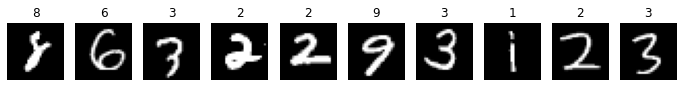

In [7]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

###  Implementation Details 

The MLP has been implemented using the pytorch library. A module implementing the MLP properties with a relu activation fucntion has been used. 
Moreover a one hot label encodeing is implemented in order to efficiently count the amount of error in the train and test set. 
The loss has been chosen to be a man quadratic one and the optimizer is a stochastic gradient descent. The latter have been chosen as they give decent results while being computationally reasonable for such problem. 

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [9]:
class MLP(nn.Module):
    def __init__(self, nb_hidden:int):
        super().__init__()
        """
        Multi Layer Perceptron Module 

        Arguments: 
        nb_hidden [int]: Dimension of the hidden layer 

        Attributes: 
        fc1: First fully connected linear layer (28*28) -->nb_hidden 
        fc2: Second fully connected linear layer (nb_hidden) --> 10 

        """
        self.fc1 = nn.Linear(28*28, nb_hidden)
        self.fc2 = nn.Linear(nb_hidden, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x.view(-1, 28*28)))
        x = self.fc2(x)
        return x


def train_model(model:nn.Module, train_input:torch.tensor, train_target:torch.tensor, mini_batch_size: int, nb_epochs: int = 20,verbose:int =0)-> [np.ndarray,np.ndarray]:

    """
    Training model function, plots the final train and test error 

    Attributes: 
    criterion: MSE Loss
    Optimizer: SGD 

    Parameters: 
    model [nn.Module]: Pytorch module wished to be trained
    train_input [torch.tensor]: input images with dimension (n,1,28,28) with n the number of images
    train_target [torch.tesnor]: input labels with dimension(n,1)
    mini_batch_size [int]: Batch Size
    nb_epochs [int]: amount of epochs,  20 by default
    verbose[int]: If >0, displays the train and test error for each epoch. 

    Returns: 
    train_error [numpy.ndarray]: array with train error pourcentage with dimension (1,nb_epoch)
    test_error [numpy.ndarray]:array with train error pourcentage with dimension (1,nb_epoch)
    """

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr = 1e-1)

    train_error=[]
    test_error=[]
    for e in range(nb_epochs):
        acc_loss = 0

        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            acc_loss = acc_loss + loss.item()
            model.zero_grad()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        nb_test_errors = compute_nb_errors(model, test_input, test_target, mini_batch_size)
        nb_train_errors = compute_nb_errors(model, train_input, train_target, mini_batch_size)

        train_error=np.append(train_error,(100 * nb_train_errors) / train_input.size(0))
        test_error=np.append(test_error,(100 * nb_test_errors) / test_input.size(0))


        if verbose>0:
            print(e,' Train error: {:0.2f}%  Test error: {:0.2f}% '.format((100 * nb_train_errors) / train_input.size(0),
                                                                        (100 * nb_test_errors) / test_input.size(0)))

        if e==nb_epochs-1:
            print('Final Train error: {:0.2f}%  Test error: {:0.2f}% '.format((100 * nb_train_errors) / train_input.size(0),
                                                                        (100 * nb_test_errors) / test_input.size(0)))
    return train_error,test_error
        
           

def compute_nb_errors(model:nn.Module, input:torch.tensor, target:torch.tensor, mini_batch_size:int)->int:
    """
    Computes the absolute number of errors of a model with respect to an input and a target 

    Parameters:
    model [nn.Module]: Model to be used
    input[torch.tensor]: input images with dimension (n,1,28,28) with n the number of images
    target [torch.tesnor]: input labels with dimension(n,1)
    mini_batch_size [int]: Batch Size

    Returns:
    nb_errors[int]: Absolute nomber of errors where the target differs from the predicted value

    """
    nb_errors = 0

    for b in range(0, input.size(0), mini_batch_size):
        output = model(input.narrow(0, b, mini_batch_size))
        _, predicted_classes = output.max(1)
        #print(predicted_classes)
        for k in range(mini_batch_size):
            if target[b + k, predicted_classes[k]] <= 0:
                nb_errors = nb_errors + 1

    return nb_errors

def convert_to_one_hot_labels(input:torch.tensor, target:torch.tensor)->torch.tensor:
    """
    Conversion to one hot labels

    Parameters: 
    input[torch.tensor]: input images with dimension (n,1,28,28) with n the number of images
    target [torch.tesnor]: input labels with dimension(n,1)

    Returns:
    tmp [torch.tensor]: One hot label tensor with dimension (n,c) with n the number of data points and c the number of classes.    
    """

    tmp = input.new_zeros(target.size(0), target.max() + 1)
    tmp.scatter_(1, target.view(-1, 1), 1.0)
    return tmp


0  Train error: 8.93%  Test error: 8.60% 
1  Train error: 7.15%  Test error: 6.73% 
2  Train error: 6.23%  Test error: 5.97% 
3  Train error: 5.65%  Test error: 5.63% 
4  Train error: 5.23%  Test error: 5.24% 
5  Train error: 4.92%  Test error: 5.00% 
6  Train error: 4.61%  Test error: 4.73% 
7  Train error: 4.32%  Test error: 4.56% 
8  Train error: 4.08%  Test error: 4.41% 
9  Train error: 3.88%  Test error: 4.24% 
10  Train error: 3.76%  Test error: 4.09% 
11  Train error: 3.63%  Test error: 3.99% 
12  Train error: 3.50%  Test error: 3.89% 
13  Train error: 3.39%  Test error: 3.86% 
14  Train error: 3.30%  Test error: 3.80% 
15  Train error: 3.22%  Test error: 3.68% 
16  Train error: 3.17%  Test error: 3.57% 
17  Train error: 3.11%  Test error: 3.49% 
18  Train error: 3.04%  Test error: 3.45% 
19  Train error: 2.99%  Test error: 3.42% 
Final Train error: 2.99%  Test error: 3.42% 


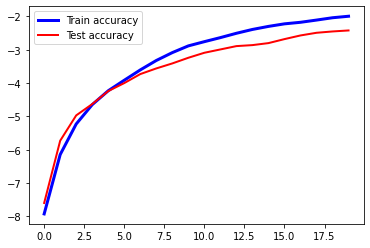

In [10]:
train_input =torch.tensor(extract_data(train_images_path, image_shape, train_set_size)).view(-1,1,28,28).float()
test_input =torch.tensor(extract_data(test_images_path, image_shape, test_set_size)).view(-1,1,28,28).float()
train_target = torch.tensor(extract_labels(train_labels_path, train_set_size))
test_target = torch.tensor(extract_labels(test_labels_path, test_set_size))

train_target=convert_to_one_hot_labels(train_input, train_target)
test_target=convert_to_one_hot_labels(test_input, test_target)

# Normalization of th data 
mu, std = train_input.mean(), train_input.std()
train_input.sub_(mu).div_(std)
test_input.sub_(mu).div_(std)


mini_batch_size = 100
model = MLP(100)
train_error,test_error=train_model(model, train_input, train_target, mini_batch_size,verbose=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,train_error.shape[0]), 1-train_error, color='blue', linewidth=3,label='Train accuracy')
ax.plot(range(0,test_error.shape[0]), 1-test_error, color='red', linewidth=2,label='Test accuracy')
ax.legend()
plt.show()


### Discussion

Once the model is trained with 20 epochs and a batch size of 100, it reaches an accuracy of 96.58% on the testing set. This is very nice for such an easy model with just one layer. 
On the plot one can notice a a clear correlation between the testing and training accuracy for a low amount of epochs. However when the amount of epochs increase, the train and test error diverge more and more. This is due to overfitting the training data. The training set is fairly large so the real effect of overfitting is not very clear. So the following figure shows the test and train accuracy for a reduced training set of 1000 data points and 200 epochs. One notices that at some point, the train accuracy is 100% while the test accuracy stagnates at 90%. This shows that the training set does not represent fully the data, which is why it is preferable to train the data with a large training set which is as diverse as possible.

Final Train error: 0.00%  Test error: 11.47% 


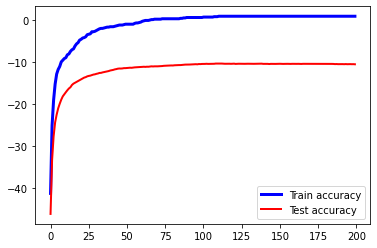

In [17]:
nb_e=200
mini_batch_size=100
model = MLP(100)
train_error,test_error=train_model(model, train_input.narrow(0,0,1000), train_target.narrow(0,0,1000), mini_batch_size,nb_epochs=nb_e,verbose=0)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,train_error.shape[0]), 1-train_error, color='blue', linewidth=3,label='Train accuracy')
ax.plot(range(0,test_error.shape[0]), 1-test_error, color='red', linewidth=2,label='Test accuracy')
ax.legend()
plt.show()